In [2]:
import MagicTools as mt
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import os

## Data Prep

In [3]:
x = np.arange(0, 5000, 1) #
l = len(x)

In [4]:
rdflist = []
for i in range(l):
    val = mt.ReadRDF('DNN_With_MagiC/NaCl_{}.rdf'.format(i), quiet = True)
    rdflist.append(val)
#rdflist is a list where each entry is an rdf file read by magictools

In [5]:
potlist = []
for i in range(l):
    poti = mt.ReadPot('DNN_With_MagiC/NaClpot{}.i010.pot'.format(i), quiet=True)
    potlist.append(poti)
#potlist is a list where each entry is an potential file read by magictools

In [6]:
rdflenNaNa = []
rdflenNaCl = []
rdflenClCl = []

intervalNaNa = round(rdflist[0].DFs[0].x[1] - rdflist[0].DFs[0].x[0], 6)
intervalNaCl = round(rdflist[0].DFs[1].x[1] - rdflist[0].DFs[1].x[0], 6)
intervalClCl = round(rdflist[0].DFs[2].x[1] - rdflist[0].DFs[2].x[0], 6)

minxvalarr = np.zeros(l)
maxxvalarr = np.zeros(l)

for i in range(l):
    nanalen = len(rdflist[i].DFs[0].x)
    nacllen = len(rdflist[i].DFs[1].x)
    clcllen = len(rdflist[i].DFs[2].x)
    
    nanamin = round(min(rdflist[i].DFs[0].x), 6)
    nanamax = round(max(rdflist[i].DFs[0].x), 6)
    
    naclmin = round(min(rdflist[i].DFs[1].x), 6)
    naclmax = round(max(rdflist[i].DFs[1].x), 6)
    
    clclmin = round(min(rdflist[i].DFs[2].x), 6)
    clclmax = round(max(rdflist[i].DFs[2].x), 6)
    
    minval = min(nanamin, naclmin, clclmin)
    maxval = max(nanamax, naclmax, clclmax)
    
    minxvalarr[i] = minval
    maxxvalarr[i] = maxval
    
if intervalNaNa != intervalNaCl:
    print('yikes')
if intervalNaNa != intervalClCl:
    print('double yikes')
    
interval = intervalNaNa

In [7]:
potlenNaNa = []
potlenNaCl = []
potlenClCl = []

interval2NaNa = round(potlist[0].DFs[0].x[1] - potlist[0].DFs[0].x[0], 6)
interval2NaCl = round(potlist[0].DFs[1].x[1] - potlist[0].DFs[1].x[0], 6)
interval2ClCl = round(potlist[0].DFs[2].x[1] - potlist[0].DFs[2].x[0], 6)

minxvalarr2 = np.zeros(l)
maxxvalarr2 = np.zeros(l)

for i in range(l):
    nanalen = len(potlist[i].DFs[0].x)
    nacllen = len(potlist[i].DFs[1].x)
    clcllen = len(potlist[i].DFs[2].x)
    
    nanamin = round(min(potlist[i].DFs[0].x), 6)
    nanamax = round(max(potlist[i].DFs[0].x), 6)
    
    naclmin = round(min(potlist[i].DFs[1].x), 6)
    naclmax = round(max(potlist[i].DFs[1].x), 6)
    
    clclmin = round(min(potlist[i].DFs[2].x), 6)
    clclmax = round(max(potlist[i].DFs[2].x), 6)
    
    minval = min(nanamin, naclmin, clclmin)
    maxval = max(nanamax, naclmax, clclmax)
    
    minxvalarr2[i] = minval
    maxxvalarr2[i] = maxval
    
if interval2NaNa != interval2NaCl:
    print('yikes')
if interval2NaNa != interval2ClCl:
    print('double yikes')
    
interval = interval2NaNa

In [8]:
minx = min(minxvalarr)
maxx = max(maxxvalarr)

In [9]:
minx2 = min(minxvalarr2)
maxx2 = max(maxxvalarr2)

In [10]:
rdfx = np.arange(minx, maxx + (interval/2), interval)
potx = np.arange(0.025, maxx2 + (interval/2), interval)
#start at 0.025 since the potential reader excludes the very high values (>60,000)

In [11]:
for i in range(len(rdfx)):
    rdfx[i] = round(rdfx[i], 6)
    
for i in range(len(potx)):
    potx[i] = round(potx[i], 6)

In [12]:
for i in range(l):
    for j in range(len(rdflist[i].DFs[0].x)):
        if round(rdflist[i].DFs[1].x[j],6) not in rdfx:
            print('error, missing ' + str(rdflist[i].DFs[1].x[j]))   

In [13]:
for i in range(l):
    for j in range(len(potlist[i].DFs[0].x)):
        if round(potlist[i].DFs[1].x[j],6) not in rdfx:
            print('error, missing ' + str(potlist[i].DFs[1].x[j])) 

In [14]:
rdfs = []
for i in range(l):
    rdflistele = np.zeros((len(rdflist[0].DFs), len(potx) ,2))
    for b in range(rdflistele.shape[0]):    
        for k in range(rdflistele.shape[1]):
            xval = potx[k]
            rdflistele[b][k][0] = xval
            yval = 0
            j = 0
            while k - j >= 0:
                if k - j < len(rdflist[i].DFs[b].x):
                    if rdflist[i].DFs[b].x[k - j] == xval:
                        yval = rdflist[i].DFs[b].y[k-j]
                        break
                j = j + 1
            rdflistele[b][k][1] = yval
    rdfs.append(rdflistele)

In [15]:
pots = []
for i in range(l):
    potlistele = np.zeros((len(potlist[0].DFs), len(potx) ,2))
    for b in range(potlistele.shape[0]):    
        for k in range(potlistele.shape[1]):
            xval = potx[k]
            potlistele[b][k][0] = xval
            yval = 100 - k
            j = 0
            while k - j >= 0:
                if k - j < len(potlist[i].DFs[b].x):
                    if potlist[i].DFs[b].x[k - j] == xval:
                        yval = potlist[i].DFs[b].y[k-j] + 10
                        break
                j = j + 1
            potlistele[b][k][1] = yval
    pots.append(potlistele)

In [16]:
for i in range(l):
    rdfs[i] = tf.convert_to_tensor(rdfs[i])
    pots[i] = tf.convert_to_tensor(pots[i])

In [17]:
rdfs = tf.stack(rdfs)
pots = tf.stack(pots)

In [18]:
inputs = []
for i in range(l):
    rdf = rdfs[i]
    newform = np.zeros((3,300))
    for a in range(3):
        for b in range(300):
            newform[a][b] = rdf[a][b][1]
    inputs.append(newform)
    
outputs = []
for i in range(l):
    pot = pots[i]
    newform = np.zeros((3,300))
    for a in range(3):
        for b in range(300):
            newform[a][b] = pot[a][b][1]
    outputs.append(newform)

In [19]:
inputs = tf.stack(inputs)
outputs = tf.stack(outputs)

## Loss Functions

In [20]:
def hublossfn(ytrue, ypred):
    thresh = 2
    error = ytrue - ypred
    issmallerr = tf.abs(error) <= thresh
    smallloss = tf.square(error)/2
    bigloss = thresh * (tf.abs(error)-(0.5*thresh))
    
    return tf.where(issmallerr, smallloss, bigloss)

In [21]:
def mpe(ytrue, ypred):
    loss = tf.keras.losses.mean_absolute_percentage_error(ytrue, ypred)
    return loss

In [22]:
def logerr(ytrue, ypred):
    loss = tf.keras.losses.MSLE(ytrue, ypred)
    return loss

In [23]:
def mse(ytrue, ypred):
    loss = tf.keras.losses.MSE(ytrue, ypred)
    return loss

In [24]:
def mae(ytrue, ypred):
    loss = tf.keras.losses.MAE(ytrue, ypred)
    return loss

## Choosing Loss Fn

In [47]:
maemodel = Sequential()
maemodel.add(Dense(input_shape= (3,300) , units = 30, activation='relu'))
maemodel.add(Dense(30, activation='relu'))
maemodel.add(Dense(units = 300, activation = 'relu'))

opt = tf.keras.optimizers.Adam()

maemodel.compile(loss = mae , optimizer= opt)
history = maemodel.fit(inputs, outputs, epochs=25, batch_size=40, verbose=1, validation_split=0.2)

Epoch 1/25
100/100 [==============================] - 1s 9ms/step - loss: 14.0506 - val_loss: 5.8890
Epoch 2/25
100/100 [==============================] - 1s 12ms/step - loss: 4.8824 - val_loss: 4.2392
Epoch 3/25
100/100 [==============================] - 1s 10ms/step - loss: 3.9439 - val_loss: 3.6498
Epoch 4/25
100/100 [==============================] - 1s 12ms/step - loss: 3.8182 - val_loss: 3.7347
Epoch 5/25
100/100 [==============================] - 1s 12ms/step - loss: 3.7998 - val_loss: 3.6192
Epoch 6/25
100/100 [==============================] - 1s 13ms/step - loss: 3.7897 - val_loss: 3.6812
Epoch 7/25
100/100 [==============================] - 1s 11ms/step - loss: 3.7848 - val_loss: 3.5912
Epoch 8/25
100/100 [==============================] - 1s 9ms/step - loss: 3.7718 - val_loss: 3.5934
Epoch 9/25
100/100 [==============================] - 1s 10ms/step - loss: 3.7636 - val_loss: 3.5798
Epoch 10/25
100/100 [==============================] - 1s 12ms/step - loss: 3.7443 - val_los

In [48]:
mpemodel = Sequential()
mpemodel.add(Dense(input_shape= (3,300) , units = 30, activation='relu'))
mpemodel.add(Dense(30, activation='relu'))
mpemodel.add(Dense(units = 300, activation = 'relu'))

opt = tf.keras.optimizers.Adam()

mpemodel.compile(loss = mpe , optimizer= opt)
history = mpemodel.fit(inputs, outputs, epochs=25, batch_size=40, verbose=0, validation_split=0.2)

In [49]:
msemodel = Sequential()
msemodel.add(Dense(input_shape= (3,300) , units = 30, activation='relu'))
msemodel.add(Dense(30, activation='relu'))
msemodel.add(Dense(units = 300, activation = 'relu'))

opt = tf.keras.optimizers.Adam()

msemodel.compile(loss = mse , optimizer= opt)
history = msemodel.fit(inputs, outputs, epochs=25, batch_size=40, verbose=0, validation_split=0.2)

In [50]:
hubmodel = Sequential()
hubmodel.add(Dense(input_shape= (3,300) , units = 30, activation='relu'))
hubmodel.add(Dense(30, activation='relu'))
hubmodel.add(Dense(units = 300, activation = 'relu'))

opt = tf.keras.optimizers.Adam()

hubmodel.compile(loss = hublossfn , optimizer= opt)
history = hubmodel.fit(inputs, outputs, epochs=25, batch_size=40, verbose=0, validation_split=0.2)

In [51]:
logmodel = Sequential()
logmodel.add(Dense(input_shape= (3,300) , units = 30, activation='relu'))
logmodel.add(Dense(30, activation='relu'))
logmodel.add(Dense(units = 300, activation = 'relu'))

opt = tf.keras.optimizers.Adam()

logmodel.compile(loss = logerr , optimizer= opt)
history = logmodel.fit(inputs, outputs, epochs=25, batch_size=40, verbose=0, validation_split=0.2)

In [148]:
i = np.random.rand(1)*5000
i = i[0]
i = round(i, 0)
i = int(i)
test = np.array([inputs[i]])

In [149]:
maepredict = maemodel.predict([test])
msepredict = msemodel.predict([test])
mpepredict = msemodel.predict([test])
hubpredict = hubmodel.predict([test])
logpredict = logmodel.predict([test])

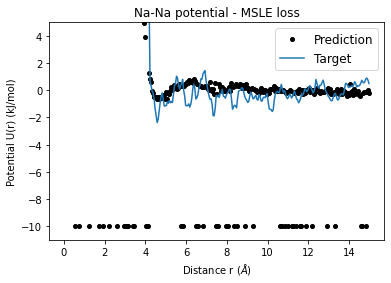

In [150]:
plt.plot(potx, logpredict[0][0] - 10, color = 'black', ls = '', marker=".", markersize=8, label = 'Prediction')
plt.plot(potx, outputs[i][0] - 10, label = 'Target')
plt.ylim((-11,5))
plt.xlabel('Distance r ($\AA$)')
plt.ylabel('Potential U(r) (kJ/mol)')

plt.title('Na-Na potential - MSLE loss')

plt.legend(fontsize = 'large')

plt.savefig('msle.png')

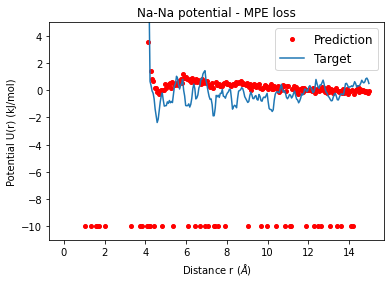

In [151]:
plt.plot(potx, mpepredict[0][0] - 10, color = 'red', ls = '', marker=".", markersize=8, label = 'Prediction')
plt.plot(potx, outputs[i][0] - 10, label = 'Target')
plt.ylim((-11,5))
plt.xlabel('Distance r ($\AA$)')

plt.ylabel('Potential U(r) (kJ/mol)')

plt.title('Na-Na potential - MPE loss')

plt.legend(fontsize = 'large')

plt.savefig('mpe.png')

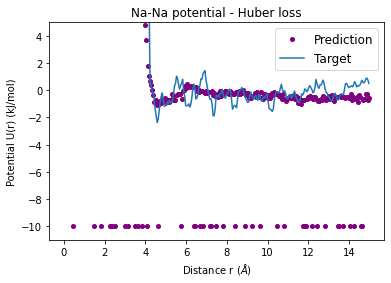

In [152]:
plt.plot(potx, hubpredict[0][0] - 10, color = 'purple', ls = '', marker=".", markersize=8, label = 'Prediction')
plt.plot(potx, outputs[i][0] - 10, label = 'Target')
plt.ylim((-11,5))
plt.xlabel('Distance r ($\AA$)')

plt.ylabel('Potential U(r) (kJ/mol)')

plt.title('Na-Na potential - Huber loss')

plt.legend(fontsize = 'large')

plt.savefig('hubere.png')

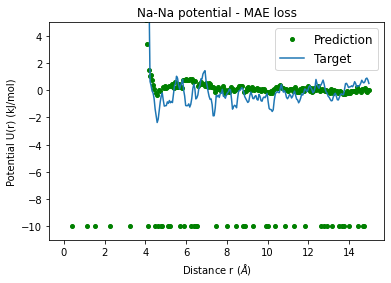

In [153]:
plt.plot(potx, maepredict[0][0] - 10, color = 'green', ls = '' , marker=".", markersize=8, label = 'Prediction')
plt.plot(potx, outputs[i][0] - 10, label = 'Target')
plt.ylim((-11,5))
plt.xlabel('Distance r ($\AA$)')

plt.ylabel('Potential U(r) (kJ/mol)')

plt.title('Na-Na potential - MAE loss')

plt.legend(fontsize = 'large')

plt.savefig('mae.png')

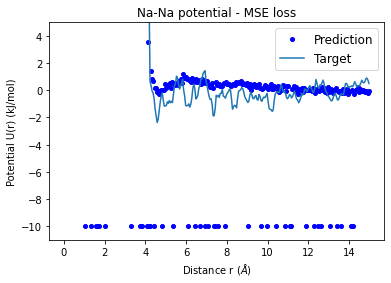

In [154]:
plt.plot(potx, msepredict[0][0] - 10, color = 'blue', ls = '', marker=".", markersize=8, label = 'Prediction')
plt.plot(potx, outputs[i][0] - 10, label = 'Target')
plt.ylim((-11,5))
plt.xlabel('Distance r ($\AA$)')

plt.ylabel('Potential U(r) (kJ/mol)')

plt.title('Na-Na potential - MSE loss')

plt.legend(fontsize = 'large')

plt.savefig('mse.png')

## Network Shape

In [174]:
model = Sequential()
model.add(Dense(input_shape= (3,300) , units = 20, activation='relu'))
model.add(Dense(units = 20, activation = 'relu'))
model.add(Dense(units = 20, activation = 'relu'))
model.add(Dense(units = 300, activation = 'relu'))

opt = tf.keras.optimizers.Adam()

model.compile(loss = logerr , optimizer= opt)
history = model.fit(inputs, outputs, epochs=25, batch_size=40, verbose=1, validation_split=0.2)

Epoch 1/25
100/100 [==============================] - 1s 10ms/step - loss: 2.9435 - val_loss: 1.8459
Epoch 2/25
100/100 [==============================] - 1s 9ms/step - loss: 1.7478 - val_loss: 1.7151
Epoch 3/25
100/100 [==============================] - 1s 9ms/step - loss: 1.6976 - val_loss: 1.6966
Epoch 4/25
100/100 [==============================] - 1s 11ms/step - loss: 1.6799 - val_loss: 1.6808
Epoch 5/25
100/100 [==============================] - 1s 8ms/step - loss: 1.6699 - val_loss: 1.6756
Epoch 6/25
100/100 [==============================] - 1s 9ms/step - loss: 1.6666 - val_loss: 1.6733
Epoch 7/25
100/100 [==============================] - 1s 10ms/step - loss: 1.6519 - val_loss: 1.6529
Epoch 8/25
100/100 [==============================] - 1s 8ms/step - loss: 1.6452 - val_loss: 1.6528
Epoch 9/25
100/100 [==============================] - 1s 7ms/step - loss: 1.6382 - val_loss: 1.5875
Epoch 10/25
100/100 [==============================] - 1s 9ms/step - loss: 1.5266 - val_loss: 1.5

## Final Networks

In [175]:
thinmodel = Sequential()
thinmodel.add(Dense(input_shape= (3,300) , units = 20, activation='relu'))
thinmodel.add(Dense(units = 300, activation = 'relu'))

opt = tf.keras.optimizers.Adam()

thinmodel.compile(loss = logerr , optimizer= opt)
history = thinmodel.fit(inputs, outputs, epochs=2500, batch_size=40, verbose=1, validation_split=0.2)

Epoch 1/2500
100/100 [==============================] - 1s 10ms/step - loss: 2.6814 - val_loss: 1.2572
Epoch 2/2500
100/100 [==============================] - 1s 9ms/step - loss: 1.1015 - val_loss: 0.9121
Epoch 3/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.6861 - val_loss: 0.5702
Epoch 4/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.5467 - val_loss: 0.5398
Epoch 5/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.5271 - val_loss: 0.5254
Epoch 6/2500
100/100 [==============================] - 2s 17ms/step - loss: 0.5176 - val_loss: 0.5185
Epoch 7/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.4979 - val_loss: 0.4949
Epoch 8/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.4910 - val_loss: 0.4933
Epoch 9/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.4890 - val_loss: 0.4905
Epoch 10/2500
100/100 [==============================] - 1s 8ms/step - loss: 

100/100 [==============================] - 1s 9ms/step - loss: 0.4506 - val_loss: 0.4524
Epoch 81/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.4505 - val_loss: 0.4524
Epoch 82/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.4505 - val_loss: 0.4526
Epoch 83/2500
100/100 [==============================] - 1s 12ms/step - loss: 0.4505 - val_loss: 0.4524
Epoch 84/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.4504 - val_loss: 0.4525
Epoch 85/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.4505 - val_loss: 0.4522
Epoch 86/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.4503 - val_loss: 0.4522
Epoch 87/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.4503 - val_loss: 0.4524
Epoch 88/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.4503 - val_loss: 0.4523
Epoch 89/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.45

100/100 [==============================] - 1s 9ms/step - loss: 0.3921 - val_loss: 0.3947
Epoch 237/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3921 - val_loss: 0.3947
Epoch 238/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3921 - val_loss: 0.3949
Epoch 239/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3920 - val_loss: 0.3947
Epoch 240/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3921 - val_loss: 0.3947
Epoch 241/2500
100/100 [==============================] - 1s 7ms/step - loss: 0.3921 - val_loss: 0.3948
Epoch 242/2500
100/100 [==============================] - 1s 12ms/step - loss: 0.3920 - val_loss: 0.3949
Epoch 243/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3920 - val_loss: 0.3948
Epoch 244/2500
100/100 [==============================] - 1s 12ms/step - loss: 0.3920 - val_loss: 0.3951
Epoch 245/2500
100/100 [==============================] - 1s 8ms/step - loss:

100/100 [==============================] - 1s 10ms/step - loss: 0.3330 - val_loss: 0.3357
Epoch 393/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3330 - val_loss: 0.3357
Epoch 394/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3330 - val_loss: 0.3356
Epoch 395/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3330 - val_loss: 0.3358
Epoch 396/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3330 - val_loss: 0.3358
Epoch 397/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3330 - val_loss: 0.3358
Epoch 398/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3330 - val_loss: 0.3359
Epoch 399/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3330 - val_loss: 0.3359
Epoch 400/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3330 - val_loss: 0.3359
Epoch 401/2500
100/100 [==============================] - 1s 9ms/step - loss

100/100 [==============================] - 1s 8ms/step - loss: 0.3326 - val_loss: 0.3352
Epoch 549/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3326 - val_loss: 0.3353
Epoch 550/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3326 - val_loss: 0.3357
Epoch 551/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3327 - val_loss: 0.3353
Epoch 552/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3326 - val_loss: 0.3354
Epoch 553/2500
100/100 [==============================] - 1s 7ms/step - loss: 0.3326 - val_loss: 0.3353
Epoch 554/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3326 - val_loss: 0.3355
Epoch 555/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.3326 - val_loss: 0.3353
Epoch 556/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3326 - val_loss: 0.3351
Epoch 557/2500
100/100 [==============================] - 1s 9ms/step - loss

100/100 [==============================] - 1s 8ms/step - loss: 0.3322 - val_loss: 0.3349
Epoch 705/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3323 - val_loss: 0.3351
Epoch 706/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3323 - val_loss: 0.3353
Epoch 707/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3322 - val_loss: 0.3350
Epoch 708/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3323 - val_loss: 0.3349
Epoch 709/2500
100/100 [==============================] - 1s 14ms/step - loss: 0.3323 - val_loss: 0.3351
Epoch 710/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3323 - val_loss: 0.3349
Epoch 711/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3322 - val_loss: 0.3353
Epoch 712/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3323 - val_loss: 0.3352
Epoch 713/2500
100/100 [==============================] - 1s 10ms/step - loss

100/100 [==============================] - 1s 10ms/step - loss: 0.3320 - val_loss: 0.3347
Epoch 861/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.3320 - val_loss: 0.3349
Epoch 862/2500
100/100 [==============================] - 1s 13ms/step - loss: 0.3320 - val_loss: 0.3349
Epoch 863/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3320 - val_loss: 0.3349
Epoch 864/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3320 - val_loss: 0.3348
Epoch 865/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3320 - val_loss: 0.3348
Epoch 866/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3320 - val_loss: 0.3346
Epoch 867/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3320 - val_loss: 0.3347
Epoch 868/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3320 - val_loss: 0.3347
Epoch 869/2500
100/100 [==============================] - 1s 9ms/step - loss

100/100 [==============================] - 1s 9ms/step - loss: 0.3319 - val_loss: 0.3349
Epoch 1017/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3319 - val_loss: 0.3346
Epoch 1018/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3319 - val_loss: 0.3347
Epoch 1019/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3319 - val_loss: 0.3347
Epoch 1020/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.3319 - val_loss: 0.3347
Epoch 1021/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3319 - val_loss: 0.3345
Epoch 1022/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3319 - val_loss: 0.3347
Epoch 1023/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3319 - val_loss: 0.3347
Epoch 1024/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3319 - val_loss: 0.3346
Epoch 1025/2500
100/100 [==============================] - 1s 11ms/st

Epoch 1171/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3318 - val_loss: 0.3345
Epoch 1172/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3319 - val_loss: 0.3345
Epoch 1173/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3318 - val_loss: 0.3346
Epoch 1174/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3318 - val_loss: 0.3347
Epoch 1175/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3319 - val_loss: 0.3345
Epoch 1176/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3319 - val_loss: 0.3348
Epoch 1177/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3319 - val_loss: 0.3346
Epoch 1178/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3318 - val_loss: 0.3346
Epoch 1179/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3318 - val_loss: 0.3345
Epoch 1180/2500
100/100 [==========================

100/100 [==============================] - 1s 12ms/step - loss: 0.3318 - val_loss: 0.3344
Epoch 1249/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3318 - val_loss: 0.3345
Epoch 1250/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3318 - val_loss: 0.3347
Epoch 1251/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3318 - val_loss: 0.3345
Epoch 1252/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.3318 - val_loss: 0.3347
Epoch 1253/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.3319 - val_loss: 0.3344
Epoch 1254/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3318 - val_loss: 0.3346
Epoch 1255/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3318 - val_loss: 0.3345
Epoch 1256/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3318 - val_loss: 0.3345
Epoch 1257/2500
100/100 [==============================] - 1s 8ms

Epoch 1326/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3318 - val_loss: 0.3347
Epoch 1327/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3318 - val_loss: 0.3346
Epoch 1328/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3318 - val_loss: 0.3345
Epoch 1329/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3318 - val_loss: 0.3347
Epoch 1330/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3318 - val_loss: 0.3345
Epoch 1331/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3318 - val_loss: 0.3348
Epoch 1332/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3318 - val_loss: 0.3346
Epoch 1333/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.3318 - val_loss: 0.3345
Epoch 1334/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3318 - val_loss: 0.3345
Epoch 1335/2500
100/100 [==========================

100/100 [==============================] - 1s 9ms/step - loss: 0.2385 - val_loss: 0.2407
Epoch 1481/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2385 - val_loss: 0.2407
Epoch 1482/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2385 - val_loss: 0.2408
Epoch 1483/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2385 - val_loss: 0.2406
Epoch 1484/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2385 - val_loss: 0.2407
Epoch 1485/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2385 - val_loss: 0.2407
Epoch 1486/2500
100/100 [==============================] - 1s 12ms/step - loss: 0.2385 - val_loss: 0.2408
Epoch 1487/2500
100/100 [==============================] - 1s 12ms/step - loss: 0.2385 - val_loss: 0.2405
Epoch 1488/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2385 - val_loss: 0.2405
Epoch 1489/2500
100/100 [==============================] - 1s 9ms

Epoch 1635/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2384 - val_loss: 0.2408
Epoch 1636/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2384 - val_loss: 0.2405
Epoch 1637/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2384 - val_loss: 0.2404
Epoch 1638/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2384 - val_loss: 0.2408
Epoch 1639/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2384 - val_loss: 0.2404
Epoch 1640/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2384 - val_loss: 0.2409
Epoch 1641/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2384 - val_loss: 0.2406
Epoch 1642/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2384 - val_loss: 0.2405
Epoch 1643/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2384 - val_loss: 0.2404
Epoch 1644/2500
100/100 [===========================

100/100 [==============================] - 1s 9ms/step - loss: 0.2383 - val_loss: 0.2403
Epoch 1790/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2384 - val_loss: 0.2405
Epoch 1791/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2383 - val_loss: 0.2405
Epoch 1792/2500
100/100 [==============================] - 1s 7ms/step - loss: 0.2383 - val_loss: 0.2404
Epoch 1793/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2383 - val_loss: 0.2407
Epoch 1794/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2383 - val_loss: 0.2405
Epoch 1795/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2383 - val_loss: 0.2405
Epoch 1796/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2383 - val_loss: 0.2405
Epoch 1797/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2383 - val_loss: 0.2404
Epoch 1798/2500
100/100 [==============================] - 1s 9ms/st

Epoch 1944/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2383 - val_loss: 0.2405
Epoch 1945/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2383 - val_loss: 0.2403
Epoch 1946/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2383 - val_loss: 0.2405
Epoch 1947/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2383 - val_loss: 0.2405
Epoch 1948/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2383 - val_loss: 0.2404
Epoch 1949/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2383 - val_loss: 0.2406
Epoch 1950/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2383 - val_loss: 0.2404
Epoch 1951/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2383 - val_loss: 0.2405
Epoch 1952/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2383 - val_loss: 0.2404
Epoch 1953/2500
100/100 [========================

100/100 [==============================] - 1s 11ms/step - loss: 0.2383 - val_loss: 0.2403
Epoch 2099/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2383 - val_loss: 0.2405
Epoch 2100/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2383 - val_loss: 0.2406
Epoch 2101/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2383 - val_loss: 0.2405
Epoch 2102/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2383 - val_loss: 0.2405
Epoch 2103/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2383 - val_loss: 0.2404
Epoch 2104/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2383 - val_loss: 0.2403
Epoch 2105/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2383 - val_loss: 0.2404
Epoch 2106/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2383 - val_loss: 0.2404
Epoch 2107/2500
100/100 [==============================] - 1s 9ms

Epoch 2176/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2383 - val_loss: 0.2404
Epoch 2177/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2383 - val_loss: 0.2403
Epoch 2178/2500
100/100 [==============================] - 1s 7ms/step - loss: 0.2383 - val_loss: 0.2403
Epoch 2179/2500
100/100 [==============================] - 1s 7ms/step - loss: 0.2383 - val_loss: 0.2403
Epoch 2180/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2383 - val_loss: 0.2403
Epoch 2181/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2383 - val_loss: 0.2403
Epoch 2182/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2383 - val_loss: 0.2408
Epoch 2183/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2383 - val_loss: 0.2404
Epoch 2184/2500
100/100 [==============================] - 1s 12ms/step - loss: 0.2383 - val_loss: 0.2404
Epoch 2185/2500
100/100 [=========================

100/100 [==============================] - 1s 10ms/step - loss: 0.1528 - val_loss: 0.1547
Epoch 2331/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.1526 - val_loss: 0.1544
Epoch 2332/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.1524 - val_loss: 0.1543
Epoch 2333/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.1523 - val_loss: 0.1544
Epoch 2334/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.1522 - val_loss: 0.1542
Epoch 2335/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.1522 - val_loss: 0.1541
Epoch 2336/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.1521 - val_loss: 0.1541
Epoch 2337/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.1521 - val_loss: 0.1542
Epoch 2338/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.1520 - val_loss: 0.1541
Epoch 2339/2500
100/100 [==============================] - 1s 8ms/st

100/100 [==============================] - 1s 12ms/step - loss: 0.1515 - val_loss: 0.1536
Epoch 2485/2500
100/100 [==============================] - 2s 17ms/step - loss: 0.1515 - val_loss: 0.1534
Epoch 2486/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.1515 - val_loss: 0.1536
Epoch 2487/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.1515 - val_loss: 0.1535
Epoch 2488/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.1515 - val_loss: 0.1537
Epoch 2489/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.1515 - val_loss: 0.1534
Epoch 2490/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.1515 - val_loss: 0.1536
Epoch 2491/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.1515 - val_loss: 0.1535
Epoch 2492/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.1515 - val_loss: 0.1537
Epoch 2493/2500
100/100 [==============================] - 1s 8

In [180]:
model3 = Sequential()
model3.add(Dense(input_shape= (3,300) , units = 20, activation='relu'))
model3.add(Dense(units = 20, activation = 'relu'))
model3.add(Dense(units = 20, activation = 'relu'))
model3.add(Dense(units = 300, activation = 'relu'))

opt = tf.keras.optimizers.Adam()

model3.compile(loss = logerr , optimizer= opt)
history = model3.fit(inputs, outputs, epochs=2500, batch_size=40, verbose=1, validation_split=0.2)

Epoch 1/2500
100/100 [==============================] - 1s 11ms/step - loss: 3.6980 - val_loss: 2.1296
Epoch 2/2500
100/100 [==============================] - 1s 9ms/step - loss: 1.9220 - val_loss: 1.8237
Epoch 3/2500
100/100 [==============================] - 1s 13ms/step - loss: 1.7082 - val_loss: 1.5508
Epoch 4/2500
100/100 [==============================] - 1s 13ms/step - loss: 1.5346 - val_loss: 1.5285
Epoch 5/2500
100/100 [==============================] - 1s 11ms/step - loss: 1.4545 - val_loss: 1.4278
Epoch 6/2500
100/100 [==============================] - 1s 8ms/step - loss: 1.4181 - val_loss: 1.4034
Epoch 7/2500
100/100 [==============================] - 1s 8ms/step - loss: 1.3567 - val_loss: 1.2640
Epoch 8/2500
100/100 [==============================] - 1s 8ms/step - loss: 1.2566 - val_loss: 1.2595
Epoch 9/2500
100/100 [==============================] - 1s 8ms/step - loss: 1.2547 - val_loss: 1.2582
Epoch 10/2500
100/100 [==============================] - 1s 8ms/step - loss: 1

Epoch 80/2500
100/100 [==============================] - 1s 9ms/step - loss: 1.1852 - val_loss: 1.1885
Epoch 81/2500
100/100 [==============================] - 1s 12ms/step - loss: 1.1851 - val_loss: 1.1886
Epoch 82/2500
100/100 [==============================] - 2s 23ms/step - loss: 1.1850 - val_loss: 1.1885
Epoch 83/2500
100/100 [==============================] - 3s 29ms/step - loss: 1.1850 - val_loss: 1.1887
Epoch 84/2500
100/100 [==============================] - 3s 27ms/step - loss: 1.1849 - val_loss: 1.1884
Epoch 85/2500
100/100 [==============================] - 3s 26ms/step - loss: 1.1848 - val_loss: 1.1883
Epoch 86/2500
100/100 [==============================] - 1s 10ms/step - loss: 1.1847 - val_loss: 1.1882
Epoch 87/2500
100/100 [==============================] - 1s 10ms/step - loss: 1.1846 - val_loss: 1.1881
Epoch 88/2500
100/100 [==============================] - 1s 13ms/step - loss: 1.1846 - val_loss: 1.1885
Epoch 89/2500
100/100 [==============================] - 1s 10ms/

100/100 [==============================] - 2s 19ms/step - loss: 0.8055 - val_loss: 0.8088
Epoch 237/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.8055 - val_loss: 0.8088
Epoch 238/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.8055 - val_loss: 0.8087
Epoch 239/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.8056 - val_loss: 0.8087
Epoch 240/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.8055 - val_loss: 0.8088
Epoch 241/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.8055 - val_loss: 0.8088
Epoch 242/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.8055 - val_loss: 0.8087
Epoch 243/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.8055 - val_loss: 0.8089
Epoch 244/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.8055 - val_loss: 0.8087
Epoch 245/2500
100/100 [==============================] - 1s 10ms/step - l

100/100 [==============================] - 1s 10ms/step - loss: 0.3816 - val_loss: 0.3845
Epoch 393/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3816 - val_loss: 0.3846
Epoch 394/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3817 - val_loss: 0.3845
Epoch 395/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3816 - val_loss: 0.3849
Epoch 396/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3817 - val_loss: 0.3843
Epoch 397/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3816 - val_loss: 0.3842
Epoch 398/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3816 - val_loss: 0.3842
Epoch 399/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3816 - val_loss: 0.3844
Epoch 400/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3615 - val_loss: 0.3195
Epoch 401/2500
100/100 [==============================] - 1s 10ms/step - los

100/100 [==============================] - 1s 11ms/step - loss: 0.3122 - val_loss: 0.3149
Epoch 549/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3122 - val_loss: 0.3150
Epoch 550/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3122 - val_loss: 0.3151
Epoch 551/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.3122 - val_loss: 0.3149
Epoch 552/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3122 - val_loss: 0.3150
Epoch 553/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.3122 - val_loss: 0.3153
Epoch 554/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3122 - val_loss: 0.3151
Epoch 555/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.3122 - val_loss: 0.3149
Epoch 556/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.3122 - val_loss: 0.3150
Epoch 557/2500
100/100 [==============================] - 1s 9ms/step - lo

100/100 [==============================] - 1s 11ms/step - loss: 0.2926 - val_loss: 0.2955
Epoch 705/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2926 - val_loss: 0.2954
Epoch 706/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2926 - val_loss: 0.2955
Epoch 707/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2926 - val_loss: 0.2953
Epoch 708/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2926 - val_loss: 0.2955
Epoch 709/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2926 - val_loss: 0.2953
Epoch 710/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2926 - val_loss: 0.2953
Epoch 711/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2926 - val_loss: 0.2954
Epoch 712/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2926 - val_loss: 0.2953
Epoch 713/2500
100/100 [==============================] - 1s 10ms/step - 

100/100 [==============================] - 1s 8ms/step - loss: 0.2477 - val_loss: 0.2500
Epoch 861/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2478 - val_loss: 0.2499
Epoch 862/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2478 - val_loss: 0.2498
Epoch 863/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2478 - val_loss: 0.2498
Epoch 864/2500
100/100 [==============================] - 1s 12ms/step - loss: 0.2477 - val_loss: 0.2499
Epoch 865/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2477 - val_loss: 0.2498
Epoch 866/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2477 - val_loss: 0.2500
Epoch 867/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2477 - val_loss: 0.2500
Epoch 868/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2478 - val_loss: 0.2500
Epoch 869/2500
100/100 [==============================] - 1s 9ms/step - l

100/100 [==============================] - 1s 12ms/step - loss: 0.2477 - val_loss: 0.2500
Epoch 1017/2500
100/100 [==============================] - 2s 23ms/step - loss: 0.2477 - val_loss: 0.2499
Epoch 1018/2500
100/100 [==============================] - 2s 17ms/step - loss: 0.2477 - val_loss: 0.2497
Epoch 1019/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2477 - val_loss: 0.2497
Epoch 1020/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2477 - val_loss: 0.2499
Epoch 1021/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2477 - val_loss: 0.2498
Epoch 1022/2500
100/100 [==============================] - 1s 12ms/step - loss: 0.2477 - val_loss: 0.2498
Epoch 1023/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2477 - val_loss: 0.2500
Epoch 1024/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2477 - val_loss: 0.2500
Epoch 1025/2500
100/100 [==============================] - 1s 1

100/100 [==============================] - 1s 9ms/step - loss: 0.2476 - val_loss: 0.2499
Epoch 1171/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2476 - val_loss: 0.2498
Epoch 1172/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2476 - val_loss: 0.2497
Epoch 1173/2500
100/100 [==============================] - 1s 12ms/step - loss: 0.2476 - val_loss: 0.2498
Epoch 1174/2500
100/100 [==============================] - 1s 12ms/step - loss: 0.2476 - val_loss: 0.2497
Epoch 1175/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2476 - val_loss: 0.2498
Epoch 1176/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2476 - val_loss: 0.2498
Epoch 1177/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2476 - val_loss: 0.2497
Epoch 1178/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2476 - val_loss: 0.2497
Epoch 1179/2500
100/100 [==============================] - 1s 9ms

100/100 [==============================] - 1s 9ms/step - loss: 0.2474 - val_loss: 0.2496
Epoch 1325/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2474 - val_loss: 0.2495
Epoch 1326/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2475 - val_loss: 0.2498
Epoch 1327/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2475 - val_loss: 0.2495
Epoch 1328/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2475 - val_loss: 0.2496
Epoch 1329/2500
100/100 [==============================] - 1s 12ms/step - loss: 0.2475 - val_loss: 0.2497
Epoch 1330/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2475 - val_loss: 0.2496
Epoch 1331/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2475 - val_loss: 0.2495
Epoch 1332/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2475 - val_loss: 0.2495
Epoch 1333/2500
100/100 [==============================] - 1s 11ms/ste

Epoch 1402/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2473 - val_loss: 0.2494
Epoch 1403/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2473 - val_loss: 0.2493
Epoch 1404/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2473 - val_loss: 0.2494
Epoch 1405/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2473 - val_loss: 0.2494
Epoch 1406/2500
100/100 [==============================] - 2s 16ms/step - loss: 0.2473 - val_loss: 0.2492
Epoch 1407/2500
100/100 [==============================] - 1s 12ms/step - loss: 0.2473 - val_loss: 0.2494
Epoch 1408/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2473 - val_loss: 0.2494
Epoch 1409/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2473 - val_loss: 0.2493
Epoch 1410/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2472 - val_loss: 0.2493
Epoch 1411/2500
100/100 [=========================

100/100 [==============================] - 1s 10ms/step - loss: 0.2469 - val_loss: 0.2485
Epoch 1557/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2470 - val_loss: 0.2486
Epoch 1558/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2469 - val_loss: 0.2486
Epoch 1559/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2469 - val_loss: 0.2486
Epoch 1560/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2469 - val_loss: 0.2487
Epoch 1561/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2469 - val_loss: 0.2485
Epoch 1562/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2469 - val_loss: 0.2486
Epoch 1563/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2469 - val_loss: 0.2486
Epoch 1564/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2469 - val_loss: 0.2488
Epoch 1565/2500
100/100 [==============================] - 1s 9ms/

100/100 [==============================] - 1s 10ms/step - loss: 0.2468 - val_loss: 0.2485
Epoch 1711/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2468 - val_loss: 0.2486
Epoch 1712/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2468 - val_loss: 0.2488
Epoch 1713/2500
100/100 [==============================] - 1s 13ms/step - loss: 0.2468 - val_loss: 0.2486
Epoch 1714/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2469 - val_loss: 0.2488
Epoch 1715/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2468 - val_loss: 0.2486
Epoch 1716/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2468 - val_loss: 0.2485
Epoch 1717/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2468 - val_loss: 0.2486
Epoch 1718/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2468 - val_loss: 0.2486
Epoch 1719/2500
100/100 [==============================] - 1s 10ms

100/100 [==============================] - 1s 10ms/step - loss: 0.2468 - val_loss: 0.2492
Epoch 1865/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2468 - val_loss: 0.2487
Epoch 1866/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2468 - val_loss: 0.2489
Epoch 1867/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2468 - val_loss: 0.2491
Epoch 1868/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2468 - val_loss: 0.2486
Epoch 1869/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2468 - val_loss: 0.2486
Epoch 1870/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2468 - val_loss: 0.2485
Epoch 1871/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2468 - val_loss: 0.2487
Epoch 1872/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2468 - val_loss: 0.2490
Epoch 1873/2500
100/100 [==============================] - 1s 8ms/

100/100 [==============================] - 1s 9ms/step - loss: 0.2468 - val_loss: 0.2489
Epoch 2019/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2468 - val_loss: 0.2490
Epoch 2020/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2468 - val_loss: 0.2492
Epoch 2021/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2468 - val_loss: 0.2489
Epoch 2022/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2467 - val_loss: 0.2488
Epoch 2023/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2468 - val_loss: 0.2488
Epoch 2024/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2467 - val_loss: 0.2487
Epoch 2025/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2467 - val_loss: 0.2487
Epoch 2026/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2467 - val_loss: 0.2486
Epoch 2027/2500
100/100 [==============================] - 1s 10ms/

100/100 [==============================] - 1s 9ms/step - loss: 0.2467 - val_loss: 0.2488
Epoch 2173/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2467 - val_loss: 0.2492
Epoch 2174/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2467 - val_loss: 0.2490
Epoch 2175/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2467 - val_loss: 0.2492
Epoch 2176/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2467 - val_loss: 0.2489
Epoch 2177/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2467 - val_loss: 0.2491
Epoch 2178/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2467 - val_loss: 0.2490
Epoch 2179/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2467 - val_loss: 0.2489
Epoch 2180/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2467 - val_loss: 0.2493
Epoch 2181/2500
100/100 [==============================] - 1s 11ms/

100/100 [==============================] - 1s 8ms/step - loss: 0.2467 - val_loss: 0.2489
Epoch 2327/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2467 - val_loss: 0.2490
Epoch 2328/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2467 - val_loss: 0.2489
Epoch 2329/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2467 - val_loss: 0.2492
Epoch 2330/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2467 - val_loss: 0.2492
Epoch 2331/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2468 - val_loss: 0.2490
Epoch 2332/2500
100/100 [==============================] - 1s 12ms/step - loss: 0.2467 - val_loss: 0.2489
Epoch 2333/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2467 - val_loss: 0.2488
Epoch 2334/2500
100/100 [==============================] - 1s 10ms/step - loss: 0.2467 - val_loss: 0.2490
Epoch 2335/2500
100/100 [==============================] - 1s 9ms

100/100 [==============================] - 1s 10ms/step - loss: 0.2466 - val_loss: 0.2490
Epoch 2481/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2467 - val_loss: 0.2490
Epoch 2482/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2467 - val_loss: 0.2491
Epoch 2483/2500
100/100 [==============================] - 1s 12ms/step - loss: 0.2467 - val_loss: 0.2491
Epoch 2484/2500
100/100 [==============================] - 1s 8ms/step - loss: 0.2467 - val_loss: 0.2490
Epoch 2485/2500
100/100 [==============================] - 1s 11ms/step - loss: 0.2467 - val_loss: 0.2494
Epoch 2486/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2467 - val_loss: 0.2493
Epoch 2487/2500
100/100 [==============================] - 1s 12ms/step - loss: 0.2467 - val_loss: 0.2490
Epoch 2488/2500
100/100 [==============================] - 1s 9ms/step - loss: 0.2466 - val_loss: 0.2490
Epoch 2489/2500
100/100 [==============================] - 1s 10ms/

In [25]:
loadmodel = tf.keras.models.load_model('finalfinalmodel', compile = False)

In [26]:
loadmodel.summary()
loadmodel.compile()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 3, 20)             6020      
_________________________________________________________________
dense_101 (Dense)            (None, 3, 300)            6300      
Total params: 12,320
Trainable params: 12,320
Non-trainable params: 0
_________________________________________________________________


In [27]:
opt = tf.keras.optimizers.Adam()
loadmodel.compile(loss = logerr , optimizer= opt)
history = loadmodel.fit(inputs, outputs, epochs=1, batch_size=40, verbose=1, validation_split=0.2)

100/100 [==============================] - 1s 9ms/step - loss: 0.1515 - val_loss: 0.1535


In [182]:
thinmodel.save('finalfinalmodel')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: finalfinalmodel/assets


## Evaluation of the Network

In [74]:
model = loadmodel

In [75]:
i = np.random.rand(1)*5000
i = i[0]
i = round(i, 0)
i = int(i)
test = np.array([inputs[i]])

In [76]:
modelpredict = model.predict([test])
err = logerr(outputs[i], modelpredict[0])
print(err)
print(np.mean(err))

tf.Tensor([0.15185423 0.14875436 0.15380438], shape=(3,), dtype=float32)
0.15147097


(-15.0, 5.0)

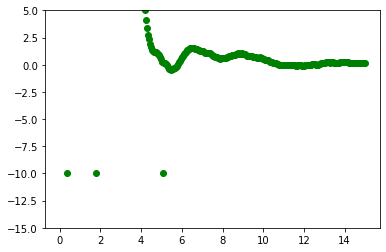

In [259]:
#plt.plot(potx, modelpredict[0][0] - 10, 'bo')
#plt.plot(potx, modelpredict[0][1] - 10, 'ro')
plt.plot(potx, modelpredict[0][2] - 10, 'go')
plt.ylim((-15,5))

In [29]:
from scipy.signal import savgol_filter

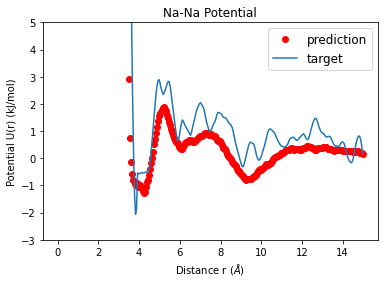

In [246]:
plt.plot(potx, modelpredict[0][0] - 10, 'ro', label = 'prediction')
plt.plot(potx, savgol_filter(outputs[i][0] - 10, 15, 3), label = 'target')
plt.ylim((-3,5))

plt.xlabel('Distance r ($\AA$)')

plt.ylabel('Potential U(r) (kJ/mol)')

plt.title('Na-Na Potential')

plt.legend(fontsize = 'large')

plt.savefig('nanatrain.png')

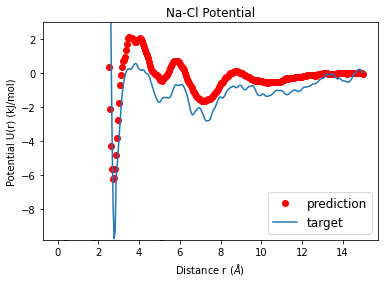

In [244]:
plt.plot(potx, modelpredict[0][1] - 10, 'ro', label = 'prediction')
plt.plot(potx, savgol_filter(outputs[i][1] - 10, 15, 3), label = 'target')
plt.ylim((-9.8,3))

plt.xlabel('Distance r ($\AA$)')

plt.ylabel('Potential U(r) (kJ/mol)')

plt.title('Na-Cl Potential')

plt.legend(fontsize = 'large')

plt.savefig('nacltrain.png')

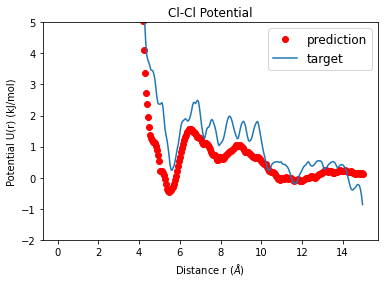

In [245]:
plt.plot(potx, modelpredict[0][2] - 10, 'ro', label = 'prediction')
plt.plot(potx, savgol_filter(outputs[i][2] - 10, 15, 3), label = 'target')
plt.ylim((-2,5))

plt.xlabel('Distance r ($\AA$)')

plt.ylabel('Potential U(r) (kJ/mol)')

plt.title('Cl-Cl Potential')

plt.legend(fontsize = 'large')

plt.savefig('clcltrain.png')

In [30]:
testrdf = mt.ReadRDF('test.rdf')
testpot = mt.ReadPot('test.pot')
truepot = mt.ReadPot('true.pot')

3 RDF-sections found 
Reading RDF-section 1 of 3
succesfull!
Reading RDF-section 2 of 3
succesfull!
Reading RDF-section 3 of 3
succesfull!
3 POTENTIAL-sections found 
Reading POTENTIAL-section 1 of 3
Reading POTENTIAL-section 2 of 3
Reading POTENTIAL-section 3 of 3
3 POTENTIAL-sections found 
Reading POTENTIAL-section 1 of 3
Reading POTENTIAL-section 2 of 3
Reading POTENTIAL-section 3 of 3


In [31]:
rdflistele = np.zeros((len(rdflist[0].DFs), len(potx) ,2))
for b in range(rdflistele.shape[0]):    
    for k in range(rdflistele.shape[1]):
        xval = potx[k]
        rdflistele[b][k][0] = xval
        yval = 0
        j = 0
        while k - j >= 0:
            if k - j < len(testrdf.DFs[b].x):
                if testrdf.DFs[b].x[k - j] == xval:
                    yval = testrdf.DFs[b].y[k-j]
                    break
            j = j + 1
        rdflistele[b][k][1] = yval

testrdf_pro = rdflistele
testrdf_pro = tf.convert_to_tensor(testrdf_pro)

potlistele = np.zeros((len(potlist[0].DFs), len(potx) ,2))
for b in range(potlistele.shape[0]):    
    for k in range(potlistele.shape[1]):
        xval = potx[k]
        potlistele[b][k][0] = xval
        yval = 100 - k
        j = 0
        while k - j >= 0:
            if k - j < len(testpot.DFs[b].x):
                if testpot.DFs[b].x[k - j] == xval:
                    yval = testpot.DFs[b].y[k-j]
                    break
            j = j + 1
        potlistele[b][k][1] = yval

testpot_pro = potlistele
testpot_pro = tf.convert_to_tensor(testpot_pro)

potlistele = np.zeros((len(potlist[0].DFs), len(potx) ,2))
for b in range(potlistele.shape[0]):    
    for k in range(potlistele.shape[1]):
        xval = potx[k]
        potlistele[b][k][0] = xval
        yval = 100 - k
        j = 0
        while k - j >= 0:
            if k - j < len(truepot.DFs[b].x):
                if truepot.DFs[b].x[k - j] == xval:
                    yval = truepot.DFs[b].y[k-j]
                    break
            j = j + 1
        potlistele[b][k][1] = yval

truepot_pro = potlistele
truepot_pro = tf.convert_to_tensor(truepot_pro)

In [32]:
tpot = np.zeros((3,300))
for a in range(3):
    for b in range(300):
        tpot[a][b] = testpot_pro[a][b][1]

    
trdf = np.zeros((3,300))
for a in range(3):
    for b in range(300):
        trdf[a][b] = testrdf_pro[a][b][1]
    
trupot = np.zeros((3,300))
for a in range(3):
    for b in range(300):
        trupot[a][b] = truepot_pro[a][b][1]

In [77]:
test = np.array([trdf])
predpot = model.predict([test])
err = logerr(tpot, predpot[0])
print(err)
print(np.mean(err))

tf.Tensor([4.70001  4.248033 4.239434], shape=(3,), dtype=float32)
4.395826


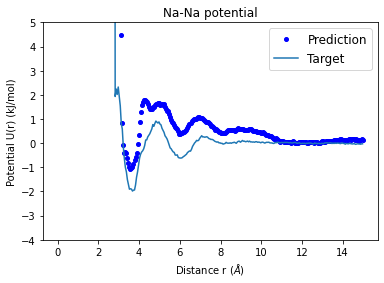

In [78]:
plt.plot(potx, predpot[0][0] - 10, color = 'blue', ls = '', marker=".", markersize=8, label = 'Prediction')
plt.plot(potx, tpot[0], label = 'Target')
#plt.plot(potx, trupot[0], label = 'True', color = 'red')
plt.ylim((-4,5))
plt.xlabel('Distance r ($\AA$)')

plt.ylabel('Potential U(r) (kJ/mol)')

plt.title('Na-Na potential')

plt.legend(fontsize = 'large')

plt.savefig('nanatest.png')

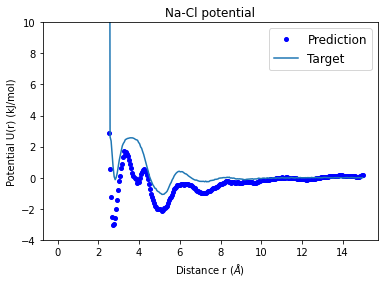

In [79]:
plt.plot(potx, predpot[0][1] - 10, color = 'blue', ls = '', marker=".", markersize=8, label = 'Prediction')
plt.plot(potx, tpot[1], label = 'Target')
#plt.plot(potx, trupot[1], label = 'True', color = 'red')
plt.ylim((-4,10))
plt.xlabel('Distance r ($\AA$)')

plt.ylabel('Potential U(r) (kJ/mol)')

plt.title('Na-Cl potential')

plt.legend(fontsize = 'large')

plt.savefig('nacltest.png')

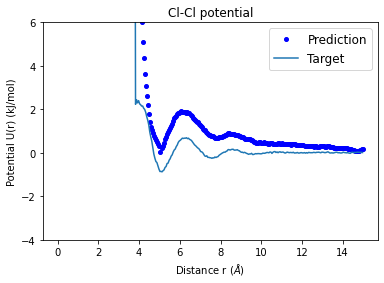

In [80]:
plt.plot(potx, predpot[0][2] - 10, color = 'blue', ls = '', marker=".", markersize=8, label = 'Prediction')
plt.plot(potx, tpot[2], label = 'Target')
#plt.plot(potx, trupot[2], label = 'True', color = 'red')
plt.ylim((-4,6))
plt.xlabel('Distance r ($\AA$)')

plt.ylabel('Potential U(r) (kJ/mol)')

plt.title('Cl-Cl potential')

plt.legend(fontsize = 'large')

plt.savefig('clcltest.png')

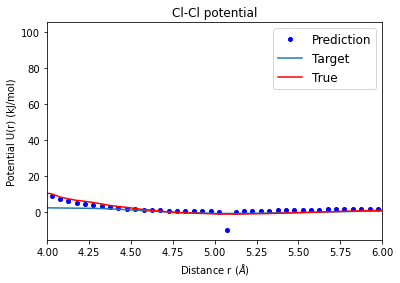

In [37]:
plt.plot(potx, predpot[0][2] - 10, color = 'blue', ls = '', marker=".", markersize=8, label = 'Prediction')
plt.plot(potx, tpot[2], label = 'Target')
plt.plot(potx, trupot[2], label = 'True', color = 'red')
plt.xlim((4,6))
plt.xlabel('Distance r ($\AA$)')

plt.ylabel('Potential U(r) (kJ/mol)')

plt.title('Cl-Cl potential')

plt.legend(fontsize = 'large')

In [58]:
print(predpot[0][2] - 10)

[ 90.60948     89.60333     88.59316     87.588356    86.58029
  85.57606     84.569      -10.          82.55299     81.54493
  80.53566     79.53467     78.52665     77.51495     76.512634
  75.50515     74.49902     73.49295     72.48329     71.47931
  70.47224     69.465004    68.45719     67.45149     66.443085
  65.43561     64.42839     63.423927    62.417107    61.410675
  60.397934    59.396423    58.389412    57.380608    56.379562
 -10.          54.36212     53.355476    52.348057    51.514904
  50.333458    49.321255    48.3195      47.312233    46.30597
  45.29851     44.294834    43.128803    42.774998    40.453873
  40.022514    39.01319     38.07235     37.071304    36.033447
  35.00549     34.007942    32.99752     32.01375     31.014069
  30.073647    29.086285    28.382801    27.415176    26.327888
  25.35014     24.201363    23.134762    21.924412    20.769909
  19.55673     18.650984    17.858871    17.302687    16.548992
  15.9136505   15.000916    13.763828    12.

Detected Molecular Types:['Na+_SD.CG.mcm', 'Cl-_SD.CG.mcm', 'Na+_SD.CG.mcm', 'Cl-_SD.CG.mcm']
Reading mcmfiles:{'Cl-_SD.CG.mcm', 'Na+_SD.CG.mcm'}
Reading Molecular type from mcm-file: ./Cl-_SD.CG.mcm
Reading Molecular type from mcm-file: ./Na+_SD.CG.mcm
Automatically defining list of interactions from input file. If this does not work well for your input, manually provide PairNamesList to the procedure.

3 intermolecular pairs detected ['Na-Na', 'Na-Cl', 'Cl-Cl']

0 pairwise bonds detected []

0 angles detected []

Total number of completed iterations:1
Total number of intermediate checks per iteration:0.0
Iteration  *Final *1
Pair Na-Na
Pair Na-Cl
Pair Cl-Cl


In [38]:
for i in range(300):
    if predpot[0][0][i] == 0:
        predpot[0][0][i] = (predpot[0][0][i-1] + predpot[0][0][i+1])/2
    if predpot[0][1][i] == 0:
        predpot[0][1][i] = (predpot[0][1][i-1] + predpot[0][1][i+1])/2
    if predpot[0][2][i] == 0:
        predpot[0][2][i] = (predpot[0][2][i-1] + predpot[0][2][i+1])/2

In [39]:
for i in range(300):
    for j in range(3):
        if predpot[0][j][i] - 10 > 30:
            predpot[0][j][i] = predpot[0][j][i] * 600

In [62]:
for i in range(300):
    ah = '    ' + str(potx[i]) + '0000' + '     ' + str(round(predpot[0][0][i]-10, 7))
    print(ah)

    0.0250000     61959.3085938
    0.0750000     61340.5898438
    0.1250000     60709.3671875
    0.1750000     60094.7578125
    0.2250000     59470.1171875
    0.2750000     58857.3320312
    0.3250000     58235.7226562
    0.3750000     57611.15625
    0.4250000     56986.59375
    0.4750000     56361.828125
    0.5250000     55733.2617188
    0.5750000     55130.5
    0.6250000     54505.8125
    0.6750000     53869.671875
    0.7250000     53262.7890625
    0.7750000     52639.765625
    0.8250000     52020.9296875
    0.8750000     51402.3242188
    0.9250000     50772.4882812
    0.9750000     50160.328125
    1.0250000     49538.5195312
    1.0750000     48916.2617188
    1.1250000     48292.203125
    1.1750000     47674.6601562
    1.2250000     47048.7695312
    1.2750000     46425.6953125
    1.3250000     45803.4648438
    1.3750000     45189.7734375
    1.4250000     44568.7929688
    1.4750000     43949.0546875
    1.5250000     43309.5390625
    1.5750000     42705.19

In [63]:
for i in range(300):
    ah = '    ' + str(potx[i]) + '0000' + '     ' + str(round(predpot[0][1][i]-10, 7))
    print(ah)

    0.0250000     60747.5703125
    0.0750000     60140.8085938
    0.1250000     59529.4726562
    0.1750000     58924.1953125
    0.2250000     58315.2421875
    0.2750000     57710.6289062
    0.3250000     57102.7851562
    0.3750000     56493.859375
    0.4250000     55884.9296875
    0.4750000     55275.9257812
    0.5250000     54665.5117188
    0.5750000     54064.5625
    0.6250000     53455.5703125
    0.6750000     52842.359375
    0.7250000     52239.8867188
    0.7750000     51631.4882812
    0.8250000     51024.6210938
    0.8750000     50417.8320312
    0.9250000     49806.8945312
    0.9750000     49202.484375
    1.0250000     48594.5039062
    1.0750000     47986.34375
    1.1250000     47377.5039062
    1.1750000     46771.0820312
    1.2250000     46161.5507812
    1.2750000     45553.0546875
    1.3250000     44944.859375
    1.3750000     44339.8398438
    1.4250000     43732.09375
    1.4750000     43124.796875
    1.5250000     42510.1210938
    1.5750000     41

In [64]:
for i in range(300):
    ah = '    ' + str(potx[i]) + '0000' + '     ' + str(round(predpot[0][2][i]-10, 7))
    print(ah)

    0.0250000     60355.6875
    0.0750000     59752.0
    0.1250000     59145.8984375
    0.1750000     58543.0117188
    0.2250000     57938.1757812
    0.2750000     57335.6328125
    0.3250000     56731.3984375
    0.3750000     56126.5976562
    0.4250000     55521.796875
    0.4750000     54916.9570312
    0.5250000     54311.3945312
    0.5750000     53710.8007812
    0.6250000     53105.9882812
    0.6750000     52498.9726562
    0.7250000     51897.5820312
    0.7750000     51293.0898438
    0.8250000     50689.4140625
    0.8750000     50085.7695312
    0.9250000     49479.9765625
    0.9750000     48877.5859375
    1.0250000     48273.34375
    1.0750000     47669.0039062
    1.1250000     47064.3164062
    1.1750000     46460.8945312
    1.2250000     45855.8515625
    1.2750000     45251.3632812
    1.3250000     44647.0351562
    1.3750000     44044.3554688
    1.4250000     43440.265625
    1.4750000     42836.40625
    1.5250000     42228.7617188
    1.5750000     41627

In [40]:
targetrdfs = mt.ReadMagiC('target.out', DFType = 'RDF')
predrdfs = mt.ReadMagiC('pred.out', DFType = 'RDF')

Detected Molecular Types:['Na+_SD.CG.mcm', 'Cl-_SD.CG.mcm', 'Na+_SD.CG.mcm', 'Cl-_SD.CG.mcm']
Reading mcmfiles:{'Cl-_SD.CG.mcm', 'Na+_SD.CG.mcm'}
Reading Molecular type from mcm-file: ./Cl-_SD.CG.mcm
Reading Molecular type from mcm-file: ./Na+_SD.CG.mcm
Automatically defining list of interactions from input file. If this does not work well for your input, manually provide PairNamesList to the procedure.

3 intermolecular pairs detected ['Na-Na', 'Na-Cl', 'Cl-Cl']

0 pairwise bonds detected []

0 angles detected []

Total number of completed iterations:1
Total number of intermediate checks per iteration:2.0
Iteration  *Final *1
Pair Na-Na
Pair Na-Cl
Pair Cl-Cl
Detected Molecular Types:['Na+_SD.CG.mcm', 'Cl-_SD.CG.mcm', 'Na+_SD.CG.mcm', 'Cl-_SD.CG.mcm']
Reading mcmfiles:{'Cl-_SD.CG.mcm', 'Na+_SD.CG.mcm'}
Reading Molecular type from mcm-file: ./Cl-_SD.CG.mcm
Reading Molecular type from mcm-file: ./Na+_SD.CG.mcm
Automatically defining list of interactions from input file. If this does not 

In [41]:
rdflistele = np.zeros((len(rdflist[0].DFs), len(potx) ,2))
for b in range(rdflistele.shape[0]):    
    for k in range(rdflistele.shape[1]):
        xval = potx[k]
        rdflistele[b][k][0] = xval
        yval = 0
        j = 0
        while k - j >= 0:
            if k - j < len(testrdf.DFs[b].x):
                if targetrdfs.DFs[b].x[k - j] == xval:
                    yval = targetrdfs.DFs[b].y[k-j]
                    break
            j = j + 1
        rdflistele[b][k][1] = yval

targetrdf_pro = rdflistele

rdflistele = np.zeros((len(rdflist[0].DFs), len(potx) ,2))
for b in range(rdflistele.shape[0]):    
    for k in range(rdflistele.shape[1]):
        xval = potx[k]
        rdflistele[b][k][0] = xval
        yval = 0
        j = 0
        while k - j >= 0:
            if k - j < len(testrdf.DFs[b].x):
                if predrdfs.DFs[b].x[k - j] == xval:
                    yval = predrdfs.DFs[b].y[k-j]
                    break
            j = j + 1
        rdflistele[b][k][1] = yval

predrdf_pro = rdflistele

In [42]:
predrdf = np.zeros((3,300))
for a in range(3):
    for b in range(300):
        predrdf[a][b] = predrdf_pro[a][b][1]

targetrdf = np.zeros((3,300))
for a in range(3):
    for b in range(300):
        targetrdf[a][b] = targetrdf_pro[a][b][1]

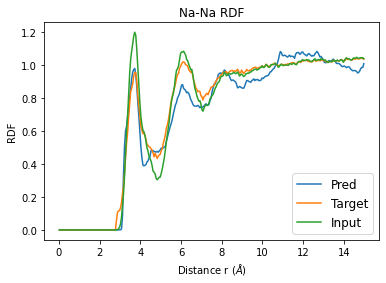

In [46]:
plt.plot(potx, predrdf[0], label = 'Pred')
plt.plot(potx, targetrdf[0], label = 'Target')
plt.plot(potx, trdf[0], label = 'Input')

plt.xlabel('Distance r ($\AA$)')

plt.ylabel('RDF')

plt.title('Na-Na RDF')

plt.legend(fontsize = 'large')

plt.savefig('nanardf.png')

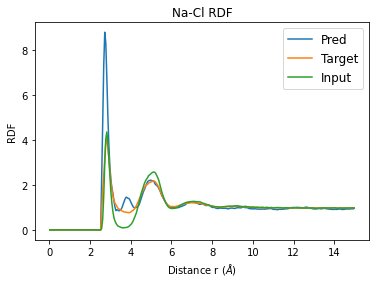

In [47]:
plt.plot(potx, predrdf[1], label = 'Pred')
plt.plot(potx, targetrdf[1], label = 'Target')
plt.plot(potx, trdf[1], label = 'Input')

plt.xlabel('Distance r ($\AA$)')

plt.ylabel('RDF')

plt.title('Na-Cl RDF')

plt.legend(fontsize = 'large')

plt.savefig('naclrdf.png')

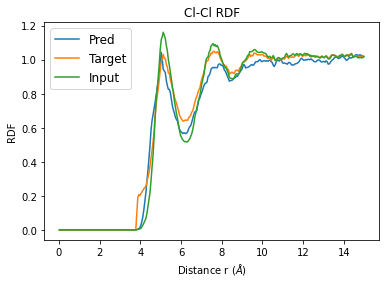

In [48]:
plt.plot(potx, predrdf[2], label = 'Pred')
plt.plot(potx, targetrdf[2], label = 'Target')
plt.plot(potx, trdf[2], label = 'Input')

plt.xlabel('Distance r ($\AA$)')

plt.ylabel('RDF')

plt.title('Cl-Cl RDF')

plt.legend(fontsize = 'large')

plt.savefig('clclrdf.png')

In [81]:
singleinputs = []
singleoutputs = []
for i in range(len(inputs)):
    for j in range(3):
        inp = inputs[i][j]
        out = outputs[i][j]
        singleinputs.append(inp)
        singleoutputs.append(out)

In [82]:
singleinputs = tf.stack(singleinputs)
singleoutputs = tf.stack(singleoutputs)

In [83]:
model = Sequential()
model.add(Dense(input_shape= (300,) , units = 20, activation='relu'))
model.add(Dense(units = 300, activation = 'relu'))

opt = tf.keras.optimizers.Adam()

model.compile(loss = logerr , optimizer= opt)
history = model.fit(singleinputs, singleoutputs, epochs=500, batch_size=40, verbose=1, validation_split=0.2)

Epoch 1/500
300/300 [==============================] - 2s 7ms/step - loss: 1.7480 - val_loss: 1.0698
Epoch 2/500
300/300 [==============================] - 2s 7ms/step - loss: 0.9751 - val_loss: 0.9466
Epoch 3/500
300/300 [==============================] - 2s 8ms/step - loss: 0.8863 - val_loss: 0.8503
Epoch 4/500
300/300 [==============================] - 2s 7ms/step - loss: 0.8401 - val_loss: 0.8404
Epoch 5/500
300/300 [==============================] - 2s 7ms/step - loss: 0.7543 - val_loss: 0.7232
Epoch 6/500
300/300 [==============================] - 2s 8ms/step - loss: 0.7169 - val_loss: 0.7195
Epoch 7/500
300/300 [==============================] - 2s 6ms/step - loss: 0.7139 - val_loss: 0.7162
Epoch 8/500
300/300 [==============================] - 2s 7ms/step - loss: 0.7115 - val_loss: 0.7145
Epoch 9/500
300/300 [==============================] - 2s 7ms/step - loss: 0.7080 - val_loss: 0.6934
Epoch 10/500
300/300 [==============================] - 4s 12ms/step - loss: 0.6876 - val_l

300/300 [==============================] - 2s 7ms/step - loss: 0.2891 - val_loss: 0.2924
Epoch 82/500
300/300 [==============================] - 2s 6ms/step - loss: 0.2890 - val_loss: 0.2925
Epoch 83/500
300/300 [==============================] - 2s 6ms/step - loss: 0.2890 - val_loss: 0.2925
Epoch 84/500
300/300 [==============================] - 2s 5ms/step - loss: 0.2891 - val_loss: 0.2928
Epoch 85/500
300/300 [==============================] - 2s 5ms/step - loss: 0.2891 - val_loss: 0.2924
Epoch 86/500
300/300 [==============================] - 2s 6ms/step - loss: 0.2889 - val_loss: 0.2924
Epoch 87/500
300/300 [==============================] - 2s 6ms/step - loss: 0.2889 - val_loss: 0.2922
Epoch 88/500
300/300 [==============================] - 2s 6ms/step - loss: 0.2889 - val_loss: 0.2924
Epoch 89/500
300/300 [==============================] - 2s 5ms/step - loss: 0.2889 - val_loss: 0.2923
Epoch 90/500
300/300 [==============================] - 2s 6ms/step - loss: 0.2889 - val_loss: 

Epoch 161/500
300/300 [==============================] - 2s 6ms/step - loss: 0.2882 - val_loss: 0.2916
Epoch 162/500
300/300 [==============================] - 2s 6ms/step - loss: 0.2882 - val_loss: 0.2916
Epoch 163/500
300/300 [==============================] - 2s 6ms/step - loss: 0.2883 - val_loss: 0.2917
Epoch 164/500
300/300 [==============================] - 2s 5ms/step - loss: 0.2883 - val_loss: 0.2916
Epoch 165/500
300/300 [==============================] - 2s 7ms/step - loss: 0.2882 - val_loss: 0.2916
Epoch 166/500
300/300 [==============================] - 2s 7ms/step - loss: 0.2882 - val_loss: 0.2919
Epoch 167/500
300/300 [==============================] - 2s 7ms/step - loss: 0.2882 - val_loss: 0.2916
Epoch 168/500
300/300 [==============================] - 2s 6ms/step - loss: 0.2882 - val_loss: 0.2916
Epoch 169/500
300/300 [==============================] - 2s 5ms/step - loss: 0.2882 - val_loss: 0.2919
Epoch 170/500
300/300 [==============================] - 2s 6ms/step - lo

300/300 [==============================] - 2s 5ms/step - loss: 0.2501 - val_loss: 0.2533
Epoch 241/500
300/300 [==============================] - 2s 6ms/step - loss: 0.2501 - val_loss: 0.2535
Epoch 242/500
300/300 [==============================] - 2s 6ms/step - loss: 0.2501 - val_loss: 0.2534
Epoch 243/500
300/300 [==============================] - 2s 6ms/step - loss: 0.2501 - val_loss: 0.2536
Epoch 244/500
300/300 [==============================] - 2s 8ms/step - loss: 0.2501 - val_loss: 0.2533
Epoch 245/500
300/300 [==============================] - 2s 5ms/step - loss: 0.2501 - val_loss: 0.2543
Epoch 246/500
300/300 [==============================] - 2s 6ms/step - loss: 0.2501 - val_loss: 0.2533
Epoch 247/500
300/300 [==============================] - 2s 6ms/step - loss: 0.2501 - val_loss: 0.2534
Epoch 248/500
300/300 [==============================] - 2s 7ms/step - loss: 0.2501 - val_loss: 0.2534
Epoch 249/500
300/300 [==============================] - 2s 7ms/step - loss: 0.2501 - v

300/300 [==============================] - 2s 6ms/step - loss: 0.1464 - val_loss: 0.1487
Epoch 320/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1464 - val_loss: 0.1489
Epoch 321/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1464 - val_loss: 0.1491
Epoch 322/500
300/300 [==============================] - 2s 6ms/step - loss: 0.1464 - val_loss: 0.1489
Epoch 323/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1464 - val_loss: 0.1494
Epoch 324/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1464 - val_loss: 0.1488
Epoch 325/500
300/300 [==============================] - 2s 6ms/step - loss: 0.1463 - val_loss: 0.1488
Epoch 326/500
300/300 [==============================] - 2s 6ms/step - loss: 0.1463 - val_loss: 0.1488
Epoch 327/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1464 - val_loss: 0.1486
Epoch 328/500
300/300 [==============================] - 3s 9ms/step - loss: 0.1464 - v

300/300 [==============================] - 2s 7ms/step - loss: 0.1462 - val_loss: 0.1489
Epoch 399/500
300/300 [==============================] - 2s 6ms/step - loss: 0.1463 - val_loss: 0.1486
Epoch 400/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1462 - val_loss: 0.1490
Epoch 401/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1462 - val_loss: 0.1490
Epoch 402/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1463 - val_loss: 0.1491
Epoch 403/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1463 - val_loss: 0.1487
Epoch 404/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1463 - val_loss: 0.1493
Epoch 405/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1463 - val_loss: 0.1488
Epoch 406/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1463 - val_loss: 0.1486
Epoch 407/500
300/300 [==============================] - 2s 6ms/step - loss: 0.1463 - v

300/300 [==============================] - 2s 7ms/step - loss: 0.1267 - val_loss: 0.1292
Epoch 478/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1268 - val_loss: 0.1291
Epoch 479/500
300/300 [==============================] - 2s 8ms/step - loss: 0.1268 - val_loss: 0.1291
Epoch 480/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1268 - val_loss: 0.1290
Epoch 481/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1268 - val_loss: 0.1293
Epoch 482/500
300/300 [==============================] - 2s 6ms/step - loss: 0.1268 - val_loss: 0.1291
Epoch 483/500
300/300 [==============================] - 2s 6ms/step - loss: 0.1268 - val_loss: 0.1294
Epoch 484/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1268 - val_loss: 0.1292
Epoch 485/500
300/300 [==============================] - 2s 7ms/step - loss: 0.1267 - val_loss: 0.1290
Epoch 486/500
300/300 [==============================] - 2s 8ms/step - loss: 0.1268 - v

In [84]:
model.save('singlemodel')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: singlemodel/assets


In [56]:
i = np.random.rand(1)*5000
i = i[0]
i = round(i, 0)
i = int(i)
test = np.array([singleinputs[i]])

In [88]:
test = np.array([trdf[0]])
predpot = model.predict([test])

In [89]:
test = np.array([trdf[0]])
predpot = model.predict([test])


modelpredict = model.predict([test])
err = logerr(outputs[i], modelpredict[0])
print(err)

tf.Tensor([0.1532904  0.22539134 0.19119492], shape=(3,), dtype=float32)


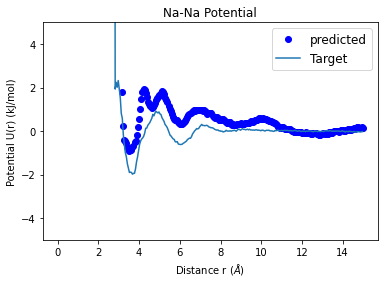

In [91]:
test = np.array([trdf[0]])
predpot = model.predict([test])


modelpredict = model.predict([test])

plt.plot(potx, modelpredict[0]-10, 'bo', label = 'predicted')
plt.plot(potx, tpot[0], label = 'Target')
plt.ylim(-5, 5)
plt.xlabel('Distance r ($\AA$)')

plt.ylabel('Potential U(r) (kJ/mol)')

plt.title('Na-Na Potential')

plt.legend(fontsize = 'large')

plt.savefig('nanasingletest.png')

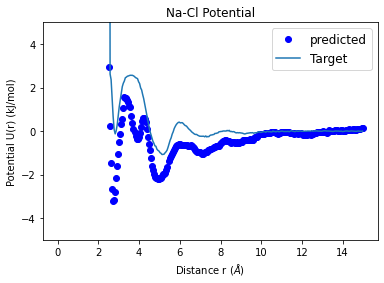

In [93]:
test = np.array([trdf[1]])
predpot = model.predict([test])


modelpredict = model.predict([test])


plt.plot(potx, modelpredict[0]-10, 'bo', label = 'predicted')
plt.plot(potx, tpot[1], label = 'Target')
plt.ylim(-5, 5)
plt.xlabel('Distance r ($\AA$)')

plt.ylabel('Potential U(r) (kJ/mol)')

plt.title('Na-Cl Potential')

plt.legend(fontsize = 'large')

plt.savefig('naclsingletest.png')

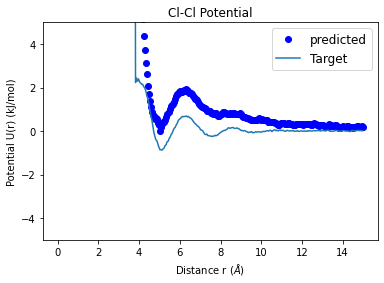

In [95]:
test = np.array([trdf[2]])
predpot = model.predict([test])


modelpredict = model.predict([test])


plt.plot(potx, modelpredict[0]-10, 'bo', label = 'predicted')
plt.plot(potx, tpot[2], label = 'Target')
plt.ylim(-5, 5)
plt.xlabel('Distance r ($\AA$)')

plt.ylabel('Potential U(r) (kJ/mol)')

plt.title('Cl-Cl Potential')

plt.legend(fontsize = 'large')

plt.savefig('clclsingletest.png')